# FACULTAD DE CIENCIAS - CIENCIA DE LA COMPUTACION
---
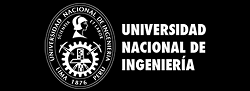
---
# TEMA: Gramatica Libre de Contexto

## Curso: Teoria de Automatas Lenguajes y Computacion  CC321-A
---

In [2]:
# clase Aleatorio - Park-Miller
class Aleatorio:
    def __init__(self, semilla):
        self.mod = 2**31 - 1
        self.a = 16807   # 7^5
        self.n = semilla

    def siguiente(self):
        self.n = (self.a * self.n) % self.mod
        return self.n

    def elegir(self, limite):
        return self.siguiente() % limite

# clase Regla
class Regla:
    def __init__(self, izquierda, derecha):
        self.left = izquierda
        self.right = derecha
        self.cont = 1

    def __repr__(self):
        derecha_str = " ".join(self.right)
        return f"{self.cont} {self.left} → {derecha_str}"


# clase Gramatica
class Gramatica:
    def __init__(self, semilla):
        self.rng = Aleatorio(semilla)
        self.reglas = {}   # diccionario: left → tuple (reglas)

    def regla(self, izquierda, derecha):
        nueva = Regla(izquierda, derecha)
        if izquierda not in self.reglas:
            self.reglas[izquierda] = (nueva,)
        else:
            self.reglas[izquierda] = self.reglas[izquierda] + (nueva,)

    def seleccionar(self, left):
        reglas = self.reglas[left]
        total = sum(r.cont for r in reglas)
        indice = self.rng.elegir(total)

        acumulado = 0
        for r in reglas:
            acumulado += r.cont
            if indice < acumulado:
                elegido = r
                break

        # actualizar cont
        for r in reglas:
            if r is not elegido:
                r.cont += 1

        return elegido.right

    def generando(self, strings):
        resultado = ""
        for s in strings:
            if s not in self.reglas:           # terminal
                resultado += s + " "
            else:                              # no terminal
                derecha = self.seleccionar(s)
                resultado += self.generando(derecha)
        return resultado

    def generar(self):
        if "inicio" not in self.reglas and "Inicio" not in self.reglas:
            raise Exception("No existe regla con 'inicio'")
        key = "inicio" if "inicio" in self.reglas else "Inicio"
        return self.generando((key,)).strip()

# Gramatica 1

Sea la gramatica $G$ libre de contexto, con la produccion $P$:

$
\begin{aligned}
\langle inicio \rangle 
    &\rightarrow \langle historia \rangle \\[4pt]
\langle historia \rangle 
    &\rightarrow \langle frase \rangle 
    \mid \langle frase \rangle\; y\; \langle historia \rangle 
    \mid \langle frase \rangle\; sino\; \langle historia \rangle \\[4pt]
\langle frase \rangle 
    &\rightarrow 
        \langle articulo \rangle\;
        \langle sustantivo \rangle\;
        \langle verbo \rangle\;
        \langle articulo \rangle\;
        \langle sustantivo \rangle \\[4pt]
\langle articulo \rangle 
    &\rightarrow el 
    \mid la
    \mid al \\[4pt]
\langle sustantivo \rangle 
    &\rightarrow gato
    \mid niño
    \mid perro
    \mid niña \\[4pt]
\langle verbo \rangle 
    &\rightarrow perseguía
    \mid besaba
\end{aligned}
$

In [3]:
# Generacion de la clase gramatica - semilla se puede modificar 
G = Gramatica(semilla=4089)

# generacion de las reglas para la gramatica
G.regla("inicio", ("historia",))
G.regla("historia", ("frase",))
G.regla("historia", ("frase", "y", "historia"))
G.regla("historia", ("frase", "sino", "historia"))
G.regla("frase", ("articulo", "sustantivo", "verbo", "articulo", "sustantivo"))
G.regla("articulo", ("el",))
G.regla("articulo", ("la",))
G.regla("articulo", ("al",))
G.regla("sustantivo", ("gato",))
G.regla("sustantivo", ("niño",))
G.regla("sustantivo", ("perro",))
G.regla("sustantivo", ("niña",))
G.regla("verbo", ("perseguía",))
G.regla("verbo", ("besaba",))

# generarando una historia
print("==========================================================")
print("Generacion de Historia con la Gramatica 1:")
print(G.generar())
print("==========================================================")


Generacion de Historia con la Gramatica 1:
el gato besaba la niña


# Gramatica 2

Sea la gramatica $G$ libre de contexto, con la produccion $P$:

In [4]:
# Generacion de la clase gramatica - semilla se puede modificar 
G = Gramatica(semilla=3919)